In [1]:
from agents.agent import SimplePolicyAgent 
from models.cnns import CNNBackbone
from envs.gym_env import RewardWrapper, ChannelFirstWrapper, NormalizeWrapper, ChannelWiseFrameStack
from gymnasium.wrappers import AtariPreprocessing, FrameStackObservation, RecordVideo
import datetime
import gymnasium as gym
import ale_py
import torch

# Enable autoreload for all modules
%load_ext autoreload
%autoreload 2

In [2]:
# Get the current timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Create the Gymnasium environment
env = gym.make("ALE/Surround-v5", render_mode="rgb_array", mode=2, difficulty=1, frameskip=5)
game = "Surround"


# Wrap the environment with RecordVideo to record videos
video_folder = f"./videos/videos_{game}_{timestamp}/"

# Make directory if it doesn't exist
import os
os.makedirs(video_folder, exist_ok=True)

render_game_every_n = 5
env = RecordVideo(
    env,
    video_folder=video_folder,
    episode_trigger=(lambda episode_id: episode_id % render_game_every_n == 0),
    fps=120
)
env = AtariPreprocessing(
    env,
    noop_max=15,
    frame_skip=1,
    screen_size=84,
    scale_obs=True,
    grayscale_obs=False
)

env = ChannelFirstWrapper(env)

# env = FrameStackObservation(env, 4)
# env = ChannelWiseFrameStack(env)

# env = NormalizeWrapper(env)

A.L.E: Arcade Learning Environment (version 0.10.1+unknown)
[Powered by Stella]
/home/bytemarish/miniconda3/envs/slitherl/lib/python3.10/site-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /home/bytemarish/ACM_AI/SlitheRL_Cleaned/videos/videos_Surround_20250128_174129 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create the policy with CNN backbone
policy = SimplePolicyAgent(env=env, device=device, use_cnn=True)
print(policy.model)

CNN Dummy Output Shape: torch.Size([1, 10368])
CNNBackbone(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2))
    (3): ReLU()
    (4): Flatten(start_dim=1, end_dim=-1)
  )
  (fc): Linear(in_features=10368, out_features=5, bias=True)
)


In [4]:
print(env.observation_space)

Box(0.0, 255.0, (3, 84, 84), float32)


In [9]:
history = []

for i in range(10):
    results_dict = policy.run_episode(env)
    print(results_dict)
    history.append(results_dict)

{'total_return': -10.0, 'policy_loss': 6.4244489669799805, 'entropy_loss': -12.845304489135742, 'total_loss': 6.423164367675781}
{'total_return': -10.0, 'policy_loss': -8.745704650878906, 'entropy_loss': -7.829806804656982, 'total_loss': -8.746487617492676}
{'total_return': -10.0, 'policy_loss': -0.00011635851114988327, 'entropy_loss': -2.524160385131836, 'total_loss': -0.0003687745484057814}
{'total_return': -10.0, 'policy_loss': -0.00017439958173781633, 'entropy_loss': -0.8154102563858032, 'total_loss': -0.00025594059843569994}
{'total_return': -10.0, 'policy_loss': -5.36171137355268e-05, 'entropy_loss': -0.2702420949935913, 'total_loss': -8.064132271101698e-05}
{'total_return': -10.0, 'policy_loss': -2.6586028980091214e-05, 'entropy_loss': -0.09147042036056519, 'total_loss': -3.573307185433805e-05}
{'total_return': -10.0, 'policy_loss': -1.2889035133412108e-05, 'entropy_loss': -0.0321640744805336, 'total_loss': -1.610544313734863e-05}
{'total_return': -10.0, 'policy_loss': -1.074666

   total_return   policy_loss  entropy_loss    total_loss
0         -10.0  6.424449e+00    -12.845304  6.423164e+00
1         -10.0 -8.745705e+00     -7.829807 -8.746488e+00
2         -10.0 -1.163585e-04     -2.524160 -3.687745e-04
3         -10.0 -1.743996e-04     -0.815410 -2.559406e-04
4         -10.0 -5.361711e-05     -0.270242 -8.064132e-05
5         -10.0 -2.658603e-05     -0.091470 -3.573307e-05
6         -10.0 -1.288904e-05     -0.032164 -1.610544e-05
7         -10.0 -1.074667e-05     -0.011674 -1.191409e-05
8         -10.0 -1.339298e-06     -0.004396 -1.778938e-06
9         -10.0 -2.262368e-11     -0.001729 -1.729722e-07


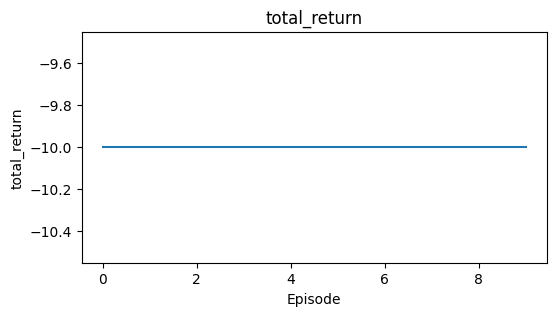

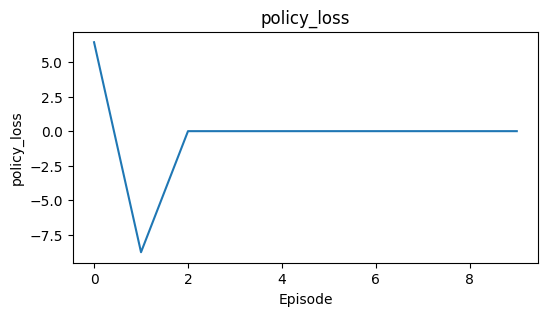

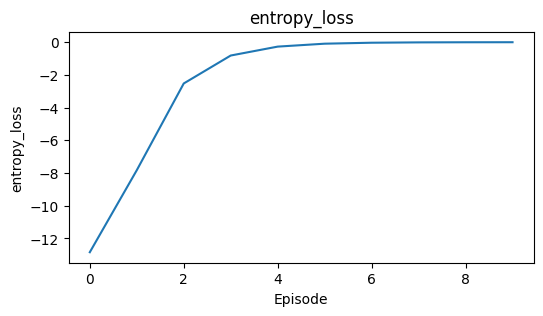

In [12]:
import matplotlib.pyplot as plt

# convert every history dict to a dataframe
import pandas as pd
df = pd.DataFrame(history)
print(df)
# {'total_return': -10.0, 'policy_loss': -7.564835071563721, 'entropy_loss': -160.30296325683594, 'total_loss': -7.580865383148193}

# make a function to plot the history
def plot_from_history(df, title, size=(6, 3)):
    plt.figure(figsize=size)
    plt.plot(df[title])
    plt.title(title)
    plt.xlabel('Episode')
    plt.ylabel(title)
    plt.show()

plot_from_history(df, 'total_return')
plot_from_history(df, 'policy_loss')
plot_from_history(df, 'entropy_loss')




In [ ]:
!mkdir -p ./models/
torch.save(policy.state_dict(), f"./models/model_{timestamp}.pth")